In [1]:
#importar las librerias y datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import metrics
import time
#separar los datos en X y Y
datos=pd.read_csv("data/applesFull.csv")
X=datos.iloc[:, :-1].to_numpy()
Y=datos.iloc[:, -1].to_numpy()
#obtener cuantos ejemplos tenemos y cuantas caracteristicas
n=np.shape(X)[0]#ejemplos
m=np.shape(X)[1]#caracteristicas
Y=np.reshape(Y, (n, 1))

In [2]:
#funcion de empacar, que regresa un diccionario con los diferentes pesos

def empacar(w1, b1, w2, b2):
    pesos=dict()
    #meter al diccionario
    pesos["w1"]=w1
    pesos["b1"]=b1
    pesos["w2"]=w2
    pesos["b2"]=b2
    return pesos

def desempacar(pesos):
    return pesos["w1"], pesos["b1"], pesos["w2"], pesos["b2"]

In [3]:
ocultas=4
salida=1
w1=np.random.rand(m, ocultas)
b1=np.zeros((1, ocultas))
w2=np.random.rand(ocultas,salida)
b2=np.zeros((1, salida))
A0=X
print("w1", np.shape(w1))
print("b1", np.shape(b1))
print("w2", np.shape(w2))
print("b2", np.shape(b2))
pesos=empacar(w1, b1, w2, b2)


w1 (2, 4)
b1 (1, 4)
w2 (4, 1)
b2 (1, 1)


In [4]:
#agrgar learning rate
lr=.01
iteraciones=100
#Propagación hacia adelante
print("A0", np.shape(A0))
for i in range(iteraciones):
    #Combinación lineal en capa 1
    Z1=np.dot(A0, w1)+b1
    #print("Z1", np.shape(Z1))
    #Activación en capa 1
    A1=1/(1+np.exp(-Z1))
    #print("A1", np.shape(A1))
    #Combinación lineal en capa 2
    #Pesos w2 multiplados por la salida de la capa anterior A1 y agregando el intercepto b2
    Z2=np.dot(A1, w2)+b2
    #print("Z2", np.shape(Z2))
    #Activación en capa 2
    A2=1/(1+np.exp(-Z2))
    #print("A2", np.shape(A2))
    #obtener el costo de propagar hacia adelante
    J=np.sum(-Y*np.log(A2)-(1-Y)*np.log(1-A2))/n
    print("J", J)
    dZ2=A2-Y
    #print("dA2", np.shape(A2))
    dw2=np.dot(A1.T, dZ2)
    #print("dw2", np.shape(dw2))
    db2=np.sum(dZ2, axis=0, keepdims=True)/n
    #print("db2", np.shape(db2))
    dA1=A1*(1-A1) #derivada de la sigmoide en capa 1
    dz1=np.dot(dZ2, w2.T)*dA1
    #print("dA1", np.shape(dA1))
    #print("dz1", np.shape(dz1))
    dw1=np.dot(A0.T, dz1)
    #print("dw1", np.shape(dw1))
    db1=np.sum(dz1, axis=0, keepdims=True)/n
    #print("db1", np.shape(db1))
    w2=w2-lr*dw2
    b2=b2-lr*db2
    b1=b1-lr*db1
    w1=w1-lr*dw1

A0 (200, 2)
J 1.1297528784954962
J 0.8129141542512863
J 0.774707528366539
J 0.7535842227768492
J 0.7410342453460828
J 0.7320156661919331
J 0.7257558529745733
J 0.720793933852634
J 0.7170677876455508
J 0.7139522201851265
J 0.711493755506957
J 0.7093671202881571
J 0.7076297083718468
J 0.7060909064480185
J 0.704800370814759
J 0.7036371851092195
J 0.7026408959092924
J 0.7017304266635978
J 0.7009363051125854
J 0.7002019551690837
J 0.6995504173791752
J 0.6989410327755072
J 0.6983905609091633
J 0.6978690858675216
J 0.6973877062284699
J 0.6969238250128612
J 0.6964825812016546
J 0.6960459145478118
J 0.6956107978353381
J 0.6951599935982324
J 0.694674618250586
J 0.6941282948953282
J 0.6934569105656456
J 0.6925785137143885
J 0.6912268539505372
J 0.6889046764985695
J 0.6836745543458583
J 0.6706663648521652
J 0.644832297714392
J 0.6200621789549523
J 0.5954630394617064
J 0.5971262792353653
J 0.7131819836423926
J 0.6937273167323201
J 0.765759381826316
J 0.6845270232797
J 0.6938258895368494
J 0.6629557

In [5]:
def entrenar(X,Y, pesos, lr=.01, iteraciones=100):
    A0=X
    costos=[]
    w1,b1,w2,b2=desempacar(pesos)
    for i in range(iteraciones):
        Z1=np.dot(A0, w1)+b1
        A1=1/(1+np.exp(-Z1))
        Z2=np.dot(A1, w2)+b2
        A2=1/(1+np.exp(-Z2))
        J=np.sum(-Y*np.log(A2)-(1-Y)*np.log(1-A2))/n
        costos.append(J)
        dZ2=A2-Y
        dw2=np.dot(A1.T, dZ2)
        db2=np.sum(dZ2, axis=0, keepdims=True)/n
        dA1=A1*(1-A1) #derivada de la sigmoide en capa 1
        dz1=np.dot(dZ2, w2.T)*dA1
        dw1=np.dot(A0.T, dz1)
        db1=np.sum(dz1, axis=0, keepdims=True)/n
        w2=w2-lr*dw2
        b2=b2-lr*db2
        b1=b1-lr*db1
        w1=w1-lr*dw1
    pesos=empacar(w1, b1, w2, b2)
    return pesos, costos

In [6]:
def clasificar(X, pesos):
    w1, b1, w2, b2=desempacar(pesos)
    Z1=np.dot(X, w1)+b1
    A1=1/(1+np.exp(-Z1))
    Z2=np.dot(A1, w2)+b2
    A2=1/(1+np.exp(-Z2))
    res=[]
    for i in A2:
        if i>.5:
            res.append(1)
        else:
            res.append(0)
    return res

In [7]:
def inicializar(entrada, ocultas, salida):
    w1=np.random.randn(entrada, ocultas)*.01
    b1=np.zeros((1, ocultas))
    w2=np.random.randn(ocultas,salida)*.01
    b2=np.zeros((1, salida))
    pesos=empacar(w1, b1, w2, b2)
    return pesos



Tomo 0.17832684516906738
Accuracy 0.88


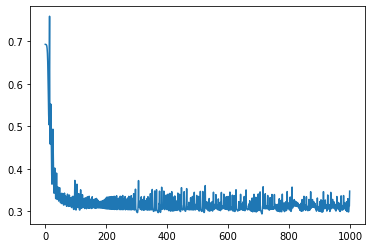

In [8]:

ocultas=4
salida=1
pesos=inicializar(m, ocultas, salida)
t0=time.time()
pesos,costos=entrenar(X, Y, pesos, iteraciones=1000)
t1=time.time()
print("Tomo", t1-t0)
resultados=clasificar(X, pesos)
plt.plot(costos)
print("Accuracy", metrics.accuracy_score(Y, resultados))
#En que iteracion se estabiliza
#Qué accuracy logran
#Cuantas neuronas en capa oculta usaron
